In [50]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import requests
import json
import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

from config import (aqs_api_key)
from config import (email_address)


# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
daily_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
annual_data_url = "https://aqs.epa.gov/data/api/annualData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"
Illinois = "17"

# Create empty lists for Imported API Data
nyCO_data = []
nyOzone_data = []
nyPM_data = []
cali_data = []
ny_data = []
dc19_data = []
dc20_data = []
mass_cm_19_data = []
mass_cm_20_data = []
mass_pm_19_data = []
mass_pm_20_data = []
mass_oz_19_data = []
mass_oz_20_data = []
illinois_nd_19_data = []
illinois_nd_20_data = []
illinois_sd_19_data = []
illinois_sd_20_data = []
illinois_cm_19_data = []
illinois_cm_20_data = []
illinois_pm_19_data = []
illinois_pm_20_data = []
illinois_oz_19_data = []
illinois_oz_20_data = []
COVIDnyCO_data = []
COVIDnyOzone_data = []
COVIDnyPM_data = []
COVIDcali_data = []
COVIDhawaii_data = []
COVIDny_data = []
COVIDdc_data = []
COVIDmass_data = []

In [64]:
#----------------------------------------------------- NEW YORK-----------------------------------------------------------

# Create a DataFrame for New York and pull carbon monoxide data from API for 2019
nyCO_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
nyCO_response = requests.get(daily_data_url, params = nyCO_params).json()
nyCO_data.append(nyCO_response)

nyCO_df = pd.DataFrame(nyCO_data[0]["Data"])


In [67]:
# Create a DataFrame for New York and pull post-COVID carbon monoxide data from API for 2020 after Covid
COVIDnyCO_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200301", "edate" : "20200701", "state" : New_York}

# Call to url
COVIDnyCO_response = requests.get(daily_data_url, params = COVIDnyCO_params).json()
COVIDnyCO_data.append(COVIDnyCO_response)

COVIDnyCO_df = pd.DataFrame(COVIDnyCO_data[0]["Data"])


In [97]:
# Filter data based on only sample duration being 8hr avg
CO8hour_df = nyCO_df.loc[nyCO_df["sample_duration"] == "8-HR RUN AVG END HOUR"]
COVIDCO8hour_df = COVIDnyCO_df.loc[COVIDnyCO_df["sample_duration"] == "8-HR RUN AVG END HOUR"]


In [70]:
# Create a DataFrame for New York and pull ozon data from API for 2019
nyOzone_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
nyOzone_response = requests.get(daily_data_url, params = nyOzone_params).json()
nyOzone_data.append(nyOzone_response)

nyOzone_df = pd.DataFrame(nyOzone_data[0]["Data"])

In [71]:
# Create a DataFrame for New York and pull ozone data from API for 2020 after Covid 
COVIDnyOzone_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20200301", "edate" : "20200701", "state" : New_York}

# Call to url
COVIDnyOzone_response = requests.get(daily_data_url, params = COVIDnyOzone_params).json()
COVIDnyOzone_data.append(COVIDnyOzone_response)

COVIDnyOzone_df = pd.DataFrame(COVIDnyOzone_data[0]["Data"])

In [99]:
# Filter data based on 8hr sample duration
Ozone8hour_df = nyOzone_df.loc[nyOzone_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"]
# Ozone8hour_df.head()

In [100]:
COVIDOzone8hour_df = COVIDnyOzone_df.loc[COVIDnyOzone_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"]
# COVIDOzone8hour_df.head()

In [75]:
# Create a DataFrame for New York and pull polution partical data from API for 2019
nyPM_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
nyPM_response = requests.get(daily_data_url, params = nyPM_params).json()
nyPM_data.append(nyPM_response)

nyPM_df = pd.DataFrame(nyPM_data[0]["Data"])

In [77]:
# Create a DataFrame for New York and pull Partical Polution data from API for 2020 after Covid
COVIDnyPM_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200301", "edate" : "20200701", "state" : New_York}

# Call to url
COVIDnyPM_response = requests.get(daily_data_url, params = COVIDnyPM_params).json()
COVIDnyPM_data.append(COVIDnyPM_response)

COVIDnyPM_df = pd.DataFrame(COVIDnyPM_data[0]["Data"])

In [78]:
# Filter data based on 24hr sample duration
PM24hour_df = nyPM_df.loc[nyPM_df["sample_duration"] == "24-HR BLK AVG"]
COVIDPM24hour_df = COVIDnyPM_df.loc[COVIDnyPM_df["sample_duration"] == "24-HR BLK AVG"]

In [81]:
# Create merged DataFrame for Ozone data for before and after Covid
mergedny_df = Ozone8hour_df.merge(Ozone8hour_df, how='outer', left_index=True, right_index=True)
COVIDmergedny_df = COVIDOzone8hour_df.merge(COVIDOzone8hour_df, how='outer', left_index=True, right_index=True)

In [83]:
# Create merged DataFrame for Ozone data for before and after Covid
mergedny_df = mergedny_df.merge(PM24hour_df, how='outer', left_index=True, right_index=True)
COVIDmergedny_df = COVIDmergedny_df.merge(COVIDPM24hour_df, how='outer', left_index=True, right_index=True)

In [84]:
# Merge all datasets to show the AQI for pre and post covid

In [101]:
NYcountyaqi = mergedny_df.groupby(["county"])["aqi"].mean().reset_index()
# NYcountyaqi

In [102]:
COVIDNYcountyaqi = COVIDmergedny_df.groupby(["county"])["aqi"].mean().reset_index()
# COVIDNYcountyaqi

In [103]:
COVIDNYcountyaqi = COVIDNYcountyaqi.rename(columns = {"aqi":"Post-COVID aqi"})
# COVIDNYcountyaqi

In [89]:
COVIDaqiMerge_df = COVIDNYcountyaqi.merge(NYcountyaqi, how='outer', on=["county"])
COVIDaqiMerge_df

,county,Post-COVID aqi,aqi
0,Bronx,17.983539,25.594483
1,Erie,21.637143,27.643006
2,Essex,13.330508,12.328402
3,Kings,15.559322,24.401685
4,Monroe,20.521368,27.631579
5,Nassau,16.542373,23.200000
6,New York,21.770950,28.598700
7,Oneida,13.000000,19.109859
8,Orange,16.537815,23.808333
9,Queens,15.393443,27.086892


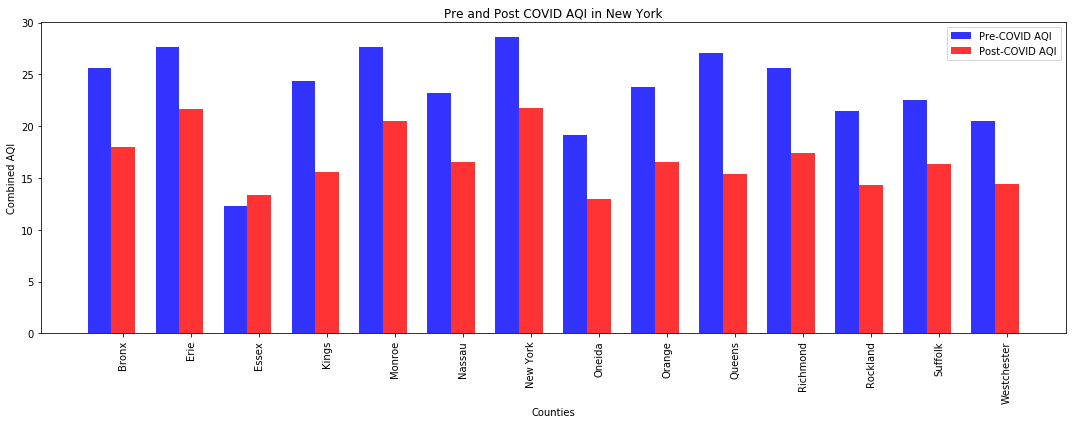

In [90]:
# Create graph showing the comparison between pre and post Covide AQI levels
n_groups = 14
county = COVIDaqiMerge_df["county"]
preCOVID = COVIDaqiMerge_df["aqi"]
postCOVID = COVIDaqiMerge_df["Post-COVID aqi"]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, preCOVID, bar_width,
alpha=opacity,
color='b',
label='Pre-COVID AQI')
 
rects2 = plt.bar(index + bar_width, postCOVID, bar_width,
alpha=opacity,
color='r',
label='Post-COVID AQI')
 
plt.xlabel('Counties')
plt.ylabel('Combined AQI')
plt.title('Pre and Post COVID AQI in New York')
plt.xticks(index + bar_width, ('Bronx', 'Erie', 'Essex', 'Kings', 'Monroe', 'Nassau', "New York", "Oneida", 'Orange', 'Queens', 'Richmond', 'Rockland', 'Suffolk', 'Westchester'), rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()
fig.savefig('plot.png')

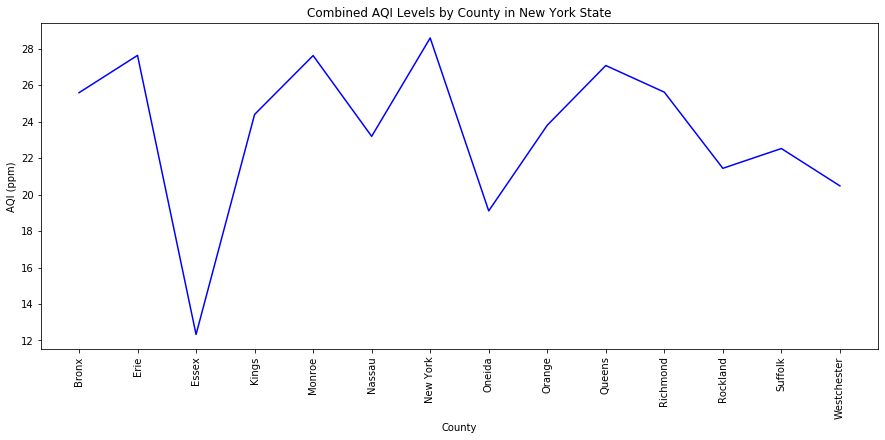

In [91]:
County = NYcountyaqi["county"]
AQI = NYcountyaqi["aqi"]
plt.title("Combined AQI Levels by County in New York State")
plt.xlabel("County")
plt.ylabel('AQI (ppm)')
plt.xticks(rotation=90)
aqibydate, = plt.plot(County, AQI, color="blue", label="Combined AQI Levels in New York State")
plt.show()

In [105]:
# mergedny_df.head()

In [106]:
newmerge = mergedny_df.drop(["method", "state_code_x", "county_code_x", "site_number_x", "poc_x", "latitude_x", "longitude_x", "datum_x", "parameter_x"], axis=1)
twomerge = newmerge.drop(["parameter_code_x", "pollutant_standard_x", "event_type_x", "validity_indicator_x", "arithmetic_mean_x", "method_code", "local_site_name", "site_address", "cbsa_code"], axis=1)
# twomerge.head()

In [107]:
NYbydate_df = pd.DataFrame(mergedny_df.groupby(["date_local", "county"]).mean().unstack())
# NYbydate_df

In [ ]:
# -------------------------------------------------  California ------------------------------------------------------------

In [110]:
# Create a DataFrame for California and pull Partical Polution data from API for 2020
cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200801", "state" : California}

# Call to url
cali_response = requests.get(daily_data_url, params = cali_params).json()
cali_data.append(cali_response)

cali_df = pd.DataFrame(cali_data[0]["Data"])
# cali_df.head()


In [109]:
# Clean data by dropping unneccesary or redundant columns
clean_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)
clean_cali_df

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
0,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-01,Micrograms/cubic meter (LC),...,45.2,2,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
1,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-01-01,Micrograms/cubic meter (LC),...,12.0,23,50.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
2,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-02,Micrograms/cubic meter (LC),...,28.6,18,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
3,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-01-02,Micrograms/cubic meter (LC),...,15.6,23,58.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
4,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-03,Micrograms/cubic meter (LC),...,15.0,8,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-06-28,Micrograms/cubic meter (LC),...,6.1,23,25.0,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7270,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-06-29,Micrograms/cubic meter (LC),...,15.0,7,NaN,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7271,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-06-29,Micrograms/cubic meter (LC),...,6.4,23,27.0,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7272,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-06-30,Micrograms/cubic meter (LC),...,12.0,5,NaN,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15


In [7]:
#looking for the presence of null values to decide how to handle them in the cleaning progress
clean_cali_df.isnull().values.any()

True

In [8]:
# Groupby date and fix null values
#Created two ways of handling the data one to look at the aqi has the only piece to the pull. The second a more flexible set
group_cali = pd.DataFrame(clean_cali_df.groupby(['date_local', 'county'])["aqi"].mean().unstack())
group2_cali = pd.DataFrame(clean_cali_df.groupby(['date_local', 'county']).mean().unstack())

# Average out data on a per month basis
group2_cali.index = pd.to_datetime(group2_cali.index)
cali_monthly2 = group2_cali.resample('M').mean()

# Average the data with the "aqi" present
group_cali.index = pd.to_datetime(group_cali.index)
cali_monthly = group_cali.resample('M').mean()
cali_monthly.head()


county,Butte,Colusa,Del Norte,Glenn,Imperial,Kern,Los Angeles,Mariposa,Nevada,Orange,...,Riverside,Sacramento,San Bernardino,San Diego,San Joaquin,Stanislaus,Sutter,Trinity,Tulare,Yolo
date_local,,,,,,,,,,,,,,,,,,,,,
2020-01-31,33.419355,34.555556,30.136364,38.516129,57.129032,61.677419,46.526882,46.423077,NaN,50.620690,...,38.369355,43.629032,35.758065,38.566129,37.040000,49.4,39.933333,42.766667,63.467742,33.903226
2020-02-29,31.959770,31.620690,37.206897,34.137931,38.800000,NaN,43.477011,37.916667,NaN,40.241379,...,34.786207,43.017241,30.379310,36.977586,34.103448,44.2,41.482759,39.923077,66.000000,34.000000
2020-03-31,18.000000,NaN,26.928571,NaN,23.666667,NaN,27.086022,NaN,8.774194,19.322581,...,18.825806,20.241935,18.080645,21.232258,21.903226,31.0,NaN,24.000000,37.750000,NaN
2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.166667,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.750000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#The file was too much data for more of the graphes to show somehting coherant so i wanted to the top producers 
big_ones=clean_cali_df.nlargest(10, ["aqi"]) 
big_ones_group=pd.DataFrame(big_ones.groupby(['date_local', 'county'])["aqi"].mean().unstack()) 
big_ones_group.head()

county,Imperial,Los Angeles,Mariposa,Riverside,Tulare
date_local,,,,,
2020-01-01,NaN,NaN,NaN,NaN,104.0
2020-01-05,NaN,NaN,127.0,NaN,NaN
2020-01-11,124.0,NaN,NaN,NaN,NaN
2020-01-13,112.0,NaN,NaN,NaN,NaN
2020-01-15,NaN,108.0,NaN,103.0,NaN


In [10]:
cali_random=group_cali.sample(n=10, frac=None, replace=False, weights=None, random_state=None, axis=1)
print (cali_random)

county         Plumas  Yolo  Orange  Imperial  San Bernardino     Placer  \
date_local                                                                 
2020-01-01        NaN  80.0    56.0      75.0            33.0  44.000000   
2020-01-02        NaN  46.0    55.0      55.0            31.0  34.666667   
2020-01-03        NaN  68.0    59.0      63.0            23.0  42.333333   
2020-01-04  69.000000  55.0    70.0      71.5            55.0  47.500000   
2020-01-05        NaN  27.0    78.0      61.0            58.0  38.000000   
...               ...   ...     ...       ...             ...        ...   
2020-06-26  27.666667   NaN     NaN       NaN             NaN        NaN   
2020-06-27  26.333333   NaN     NaN       NaN             NaN        NaN   
2020-06-28  15.333333   NaN     NaN       NaN             NaN        NaN   
2020-06-29   5.666667   NaN     NaN       NaN             NaN        NaN   
2020-06-30   8.666667   NaN     NaN       NaN             NaN        NaN   

county     

In [11]:
cali_merge_df =pd.concat([big_ones_group, cali_random]) 
cali_merge_df.head()

,Imperial,Los Angeles,Mariposa,Riverside,Tulare,Plumas,Yolo,Orange,San Bernardino,Placer,Kern,Del Norte,Colusa,Trinity
date_local,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-11,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-15,NaN,108.0,NaN,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


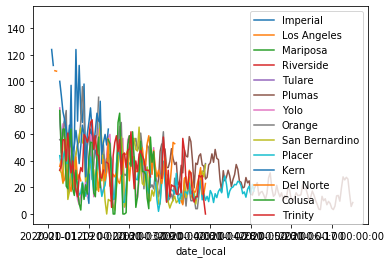

In [12]:
cali_merge_df.plot()

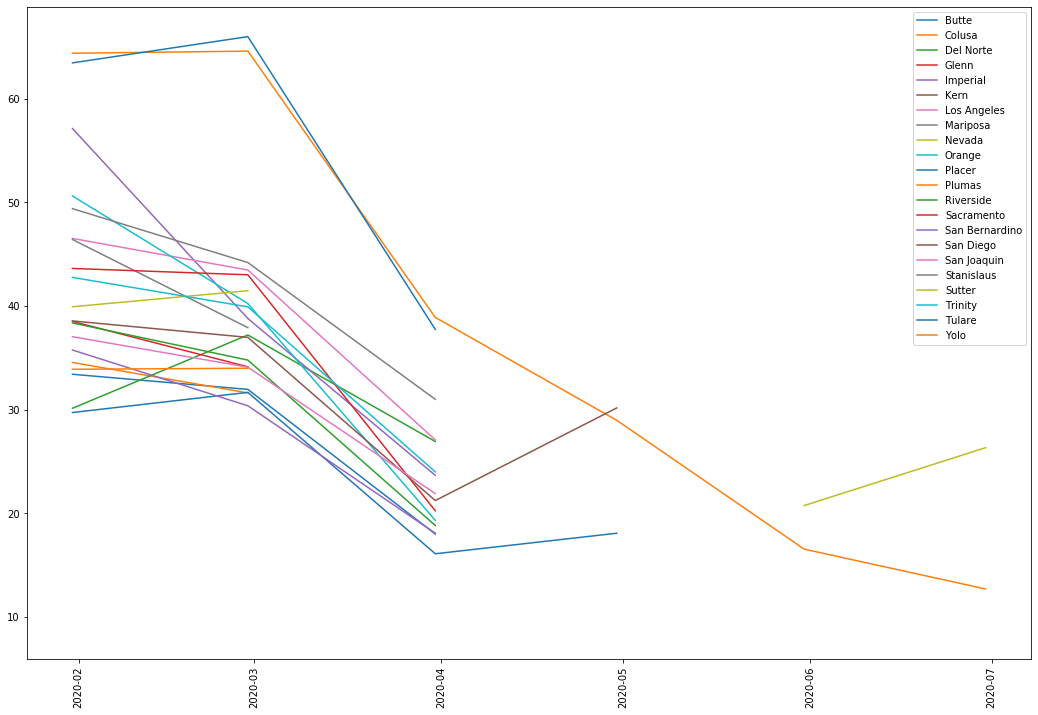

In [13]:
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = cali_monthly.index
y_values = cali_monthly
plt.plot(x_values,y_values)
ax.legend(cali_monthly)

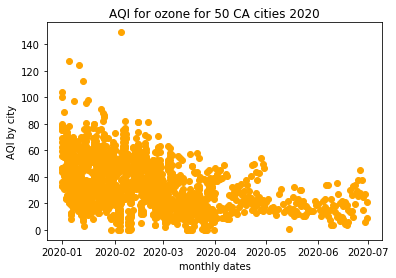

In [14]:
x_axis = group2_cali.index
x_lim = group2_cali
y_axis= group2_cali["aqi"]

plt.title("AQI for ozone for 50 CA cities 2020")
plt.xlabel("monthly dates")
plt.ylabel("AQI by city")


plt.plot_date(x_axis, y_axis, marker="o", color="orange", linewidth=1)
plt.show()

In [15]:
# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali2_data = []

In [17]:
# Create a DataFrame for California and pull carbon monoxide data from API
cali2_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20190801", "state" : California}

# Call to url
cali2_response = requests.get(daily_data_url, params = cali2_params).json()
cali2_data.append(cali2_response)

cali2_df = pd.DataFrame(cali2_data[0]["Data"])
cali2_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
1,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
2,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
3,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
4,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24


In [18]:
clean2_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)
clean2_cali_df

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
0,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-01,Micrograms/cubic meter (LC),...,45.2,2,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
1,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-01-01,Micrograms/cubic meter (LC),...,12.0,23,50.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
2,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-02,Micrograms/cubic meter (LC),...,28.6,18,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
3,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-01-02,Micrograms/cubic meter (LC),...,15.6,23,58.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
4,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-03,Micrograms/cubic meter (LC),...,15.0,8,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-06-28,Micrograms/cubic meter (LC),...,6.1,23,25.0,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7270,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-06-29,Micrograms/cubic meter (LC),...,15.0,7,NaN,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7271,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-06-29,Micrograms/cubic meter (LC),...,6.4,23,27.0,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7272,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-06-30,Micrograms/cubic meter (LC),...,12.0,5,NaN,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15


In [19]:
# Groupby date and fix null values
#Created two ways of handling the data one to look at the aqi has the only piece to the pull. The second a more flexible set
group_cali2 = pd.DataFrame(clean2_cali_df.groupby(['date_local', 'county'])["aqi"].mean().unstack())
group_cali2 = pd.DataFrame(clean2_cali_df.groupby(['date_local', 'county']).mean().unstack())

# Average out data on a per month basis
group2_cali.index = pd.to_datetime(group_cali2.index)
cali_monthly2 = group2_cali.resample('M').mean()

# Average the data with the "aqi" present
group_cali2.index = pd.to_datetime(group_cali2.index)
cali_monthly2 = group_cali2.resample('M').mean()
cali_monthly2.head()

latitude                                                     \
county          Butte    Colusa Del Norte     Glenn  Imperial       Kern   
date_local                                                                 
2020-01-31  39.560096  39.18919  41.75613  39.53387  32.67618  35.356615   
2020-02-29  39.570942  39.18919  41.75613  39.53387  32.67618        NaN   
2020-03-31  39.761680       NaN  41.75613       NaN  32.67618        NaN   
2020-04-30        NaN       NaN       NaN       NaN       NaN        NaN   
2020-05-31        NaN       NaN       NaN       NaN       NaN        NaN   

                                                       ...        aqi  \
county     Los Angeles   Mariposa    Nevada    Orange  ...  Riverside   
date_local                                             ...              
2020-01-31   34.127995  37.748707       NaN  33.83062  ...  38.369355   
2020-02-29   34.127995  37.748707       NaN  33.83062  ...  34.786207   
2020-03-31   34.127995        NaN  39.32783  33.83062  ...  18.825806   
2020-04-30         NaN        NaN       NaN       NaN  ...        NaN   
2020-05-31         NaN        NaN  39.32783       NaN  ...        NaN   

                                                                        \
county     Sacramento San Bernardino  San Diego San Joaquin Stanislaus   
date_local                                                               
2020-01-31  43.629032      35.758065  38.566129   37.040000       49.4   
2020-02-29  43.017241      30.379310  36.977586   34.103448       44.2   
2020-03-31  20.241935      18.080645  21.232258   21.903226       31.0   
2020-04-30        NaN            NaN  30.166667         NaN        NaN   
2020-05-31        NaN            NaN        NaN         NaN        NaN   

                                                        
county         Sutter    Trinity     Tulare       Yolo  
date_local                                              
2020-01-31  39.933333  42.766667  63.467742  33.903226  
2020-02-29  41.482759  39.923077  66.000000  34.000000  
2020-03-31        NaN  24.000000  37.750000        NaN  
2020-04-30        NaN        NaN        NaN        NaN  
2020-05-31        NaN        NaN        NaN        NaN  

[5 rows x 176 columns]

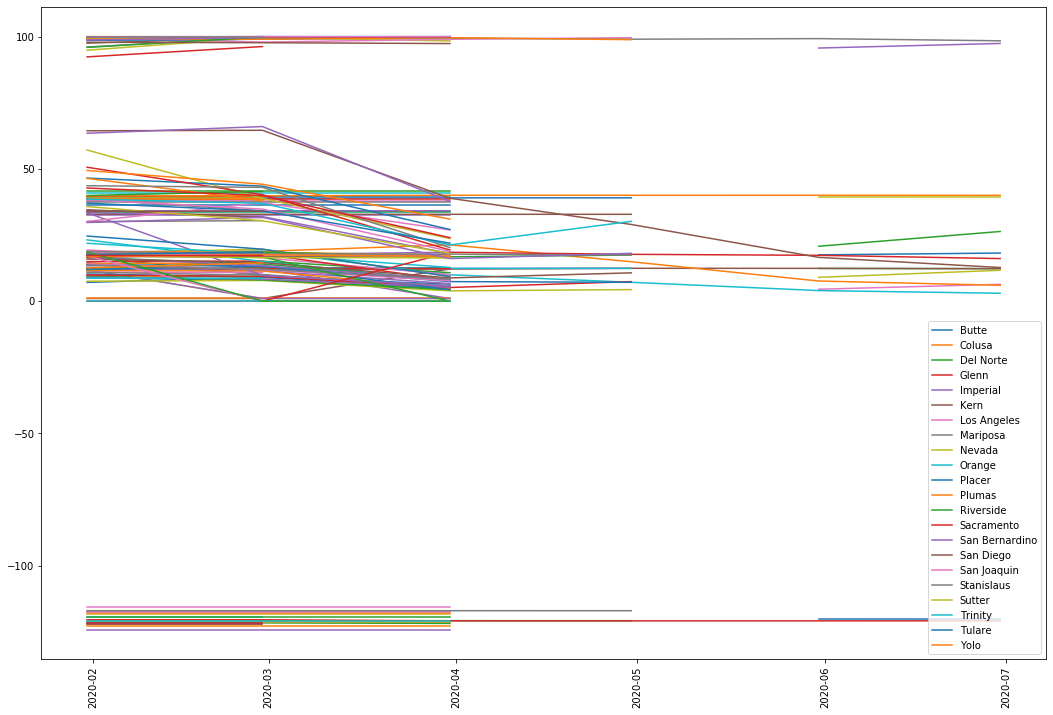

In [20]:
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = cali_monthly2.index
y_values = cali_monthly2
plt.plot(x_values,y_values)
ax.legend(cali_monthly2["aqi"])

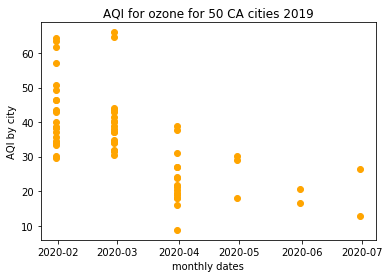

In [21]:
x_axis = cali_monthly2.index
x_lim = cali_monthly2
y_axis= cali_monthly2["aqi"]

plt.title("AQI for ozone for 50 CA cities 2019")
plt.xlabel("monthly dates")
plt.ylabel("AQI by city")


plt.plot_date(x_axis, y_axis, marker="o", color="orange", linewidth=1)
plt.show()

In [ ]:
# -------------------------------------------------- Illinois --------------------------------------------------------------

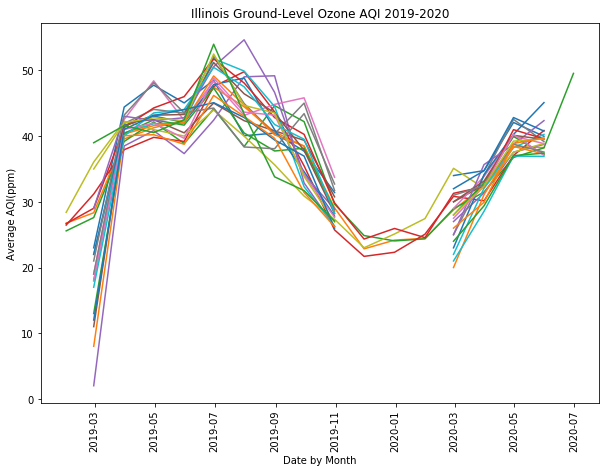

In [22]:
#Illinois 2019 and 2020 ozone 44201

illinois_oz_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_oz_19_response = requests.get(daily_data_url, params = illinois_oz_19_params).json()
illinois_oz_19_data.append(illinois_oz_19_response)

illinois_oz_19_df = pd.DataFrame(illinois_oz_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_oz_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_oz_20_response = requests.get(daily_data_url, params = illinois_oz_20_params).json()
illinois_oz_20_data.append(illinois_oz_20_response)

#create df for illinois 2020
illinois_oz_20_df = pd.DataFrame(illinois_oz_20_data[0]["Data"])
illinois_oz_20_df
#merge 2020
merge_illinois_oz_df = illinois_oz_19_df.append(illinois_oz_20_df)
# merge_illinois_oz_df.head()

#drop columns in Illinois DF. ozone Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_oz_clean_df = merge_illinois_oz_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_oz_clean_df.head()



#run ozone by 8 Hour Sample (used 24 hours because it provided a longer time frame, 8 hour only shows one year, 1 hour is nothing)
sample_duration_oz = illinois_oz_clean_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"
sample_duration_oz

illinois_oz_clean_df = illinois_oz_clean_df[sample_duration_oz]
# illinois_oz_clean_df.head()

#group Iliinois data ozone in dataframe with groupby
illinois_oz_group = pd.DataFrame(illinois_oz_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_oz_group.index
#convert index to datetime
illinois_oz_group.index = pd.to_datetime(illinois_oz_group.index)
#average data by months
monthly_oz_averages = illinois_oz_group.resample('M').mean()

# #plot aqi against time for each county ozone in group by df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 90)
x_values = monthly_oz_averages.index
y_values = monthly_oz_averages['aqi']
plt.plot(x_values,y_values)
plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Illinois Ground-Level Ozone AQI 2019-2020')
# fig.savefig('plotozone.png')

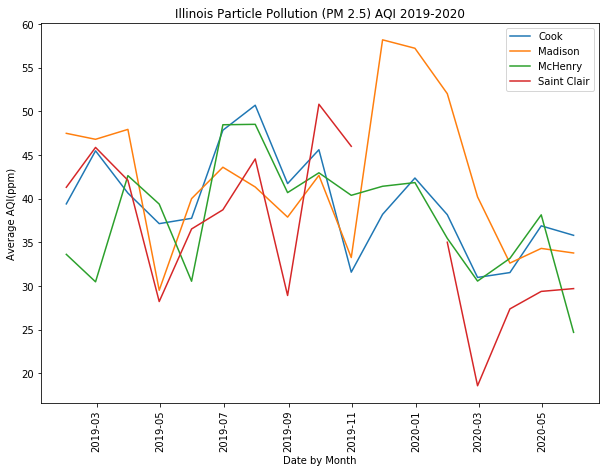

In [23]:
#Illinois 2019 and 2020 PM2.5

illinois_pm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_pm_19_response = requests.get(daily_data_url, params = illinois_pm_19_params).json()
illinois_pm_19_data.append(illinois_pm_19_response)

illinois_pm_19_df = pd.DataFrame(illinois_pm_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_pm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_pm_20_response = requests.get(daily_data_url, params = illinois_pm_20_params).json()
illinois_pm_20_data.append(illinois_pm_20_response)

#create df for illinois 2020
illinois_pm_20_df = pd.DataFrame(illinois_pm_20_data[0]["Data"])
illinois_pm_20_df
#merge 2020
merge_illinois_pm_df = illinois_pm_19_df.append(illinois_pm_20_df)
# merge_illinois_pm_df.head()


#drop columns in Illinois DF.nitrogen dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_pm_clean_df = merge_illinois_pm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
# illinois_pm_clean_df.head()

#run nitrogen dioxideby 1 hour sample - only option
sample_duration_pm = illinois_pm_clean_df["sample_duration"] == "24-HR BLK AVG"
sample_duration_pm

illinois_pm_clean_df = illinois_pm_clean_df[sample_duration_pm]
# illinois_pm_clean_df.head()
#group Iliinois data PM in dataframe with groupby
illinois_pm_group = pd.DataFrame(illinois_pm_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_pm_group.index
#convert index to datetime
illinois_pm_group.index = pd.to_datetime(illinois_pm_group.index)
#average data by months
monthly_pm_averages = illinois_pm_group.resample('M').mean()

# #plot aqi against time for each county PM in group by df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 90)
x_values = monthly_pm_averages.index
y_values = monthly_pm_averages['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Illinois Particle Pollution (PM 2.5) AQI 2019-2020')

plt.plot(x_values,y_values)
plt.legend(y_values)

# fig.savefig('plotPM2.5.png')
#needto add title, x axis labels include units of meausres, need to add legend for counties

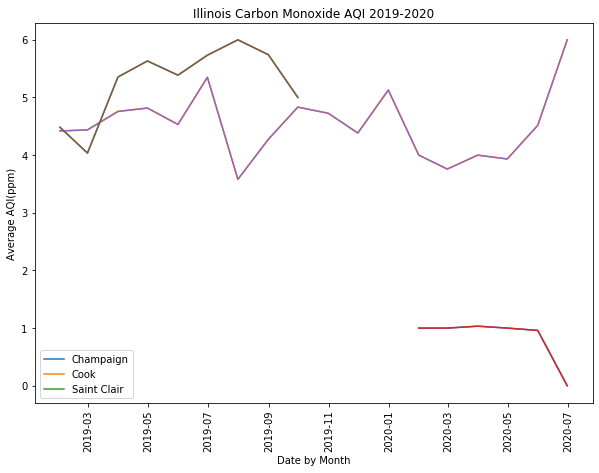

In [24]:
# Create a DataFrame for Illinois 2019 and pull carbon monoxide data from API
illinois_cm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_cm_19_response = requests.get(daily_data_url, params = illinois_cm_19_params).json()
illinois_cm_19_data.append(illinois_cm_19_response)

illinois_cm_19_df = pd.DataFrame(illinois_cm_19_data[0]["Data"])

#create DF for Illinois 2020 and pull Carbon Monoxide Data from APi
illinois_cm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_cm_20_response = requests.get(daily_data_url, params = illinois_cm_20_params).json()
illinois_cm_20_data.append(illinois_cm_20_response)

#create df for illinois 2020
illinois_cm_20_df = pd.DataFrame(illinois_cm_20_data[0]["Data"])
# illinois_cm_20_df
#merge 2020
merge_illinois_cm_df = illinois_cm_19_df.append(illinois_cm_20_df)
# merge_illinois_cm_df.head()

#drop columns in Illinois DF. Carbon Monoxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_cm_df = merge_illinois_cm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
# illinois_clean_cm_df.head()

# isolate data to 8 hour duration only carbond monoxide, 1 hour is null

sample_duration_cm = illinois_clean_cm_df["sample_duration"] == "8-HR RUN AVG END HOUR"
sample_duration_cm

illinois_clean_cm_df = illinois_clean_cm_df[sample_duration_cm]
illinois_clean_cm_df.head()

#group Iliinois carbon monoxide data in dataframe with groupby
illinois_group_cm= pd.DataFrame(illinois_clean_cm_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_cm.index
#convert index to datetime
illinois_group_cm.index = pd.to_datetime(illinois_group_cm.index)
#average data by months
monthly_averages_cm = illinois_group_cm.resample('M').mean()
# elimiate nans
# illinois_cm_df =monthly_averages_cm.fillna(0)
# illinois_cm_df
# illinois_cm_df.index

#plot aqi against time for each county cardbon monoxide in group by df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 90)
x_values = monthly_averages_cm.index
y_values = monthly_averages_cm['aqi']
plt.plot(x_values,y_values)
plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Illinois Carbon Monoxide AQI 2019-2020')

plt.plot(x_values,y_values)
plt.legend(y_values)
# fig.savefig('plotCarbon.png')

In [111]:
# ------------------------------------------------- District of Columbia --------------------------------------------------

In [113]:
# Create a DataFrame for District of Columbia and pull carbon monoxide data from API
rcParams['figure.figsize'] = 15, 6
dc_params_20 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : District_of_Columbia}

# Call to url
dc_response = requests.get(daily_data_url, params = dc_params_20).json()
dc20_data.append(dc_response)

dc_df_20 = pd.DataFrame(dc20_data[0]["Data"])

# Create a DataFrame for District of Columbia and pull carbon monoxide data from API
dc_params_19 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : District_of_Columbia}

# Call to url
dc_response = requests.get(daily_data_url, params = dc_params_19).json()
dc19_data.append(dc_response)

dc_df_19 = pd.DataFrame(dc19_data[0]["Data"])

#DC Merge
dc_df = dc_df_19.append(dc_df_20)


# dc_df.head()

In [114]:
dc_df = dc_df.dropna(subset=['aqi'])
dc_df_mean = dc_df.groupby(['state', 'parameter_code', 'date_local']).mean()
dc_df_mean = dc_df_mean.drop(columns=['observation_count', 'observation_percent', 'poc'])
dc_df_mean.head(10)

latitude  longitude  \
state                parameter_code date_local                         
District Of Columbia 42101          2020-01-01  38.908309 -76.983302   
                                    2020-01-02  38.908309 -76.983302   
                                    2020-01-03  38.908309 -76.983302   
                                    2020-01-04  38.908309 -76.983302   
                                    2020-01-05  38.908309 -76.983302   
                                    2020-01-06  38.908309 -76.983302   
                                    2020-01-07  38.908309 -76.983302   
                                    2020-01-08  38.908309 -76.983302   
                                    2020-01-09  38.908309 -76.983302   
                                    2020-01-10  38.908309 -76.983302   

                                                arithmetic_mean  \
state                parameter_code date_local                    
District Of Columbia 42101          2020-01-01         0.239474   
                                    2020-01-02         0.735416   
                                    2020-01-03         0.302083   
                                    2020-01-04         0.329167   
                                    2020-01-05         0.195833   
                                    2020-01-06         0.331250   
                                    2020-01-07         0.522917   
                                    2020-01-08         0.245833   
                                    2020-01-09         0.262500   
                                    2020-01-10         0.333334   

                                                first_max_value  \
state                parameter_code date_local                    
District Of Columbia 42101          2020-01-01             0.60   
                                    2020-01-02             1.15   
                                    2020-01-03             0.50   
                                    2020-01-04             0.50   
                                    2020-01-05             0.40   
                                    2020-01-06             0.50   
                                    2020-01-07             0.95   
                                    2020-01-08             0.35   
                                    2020-01-09             0.35   
                                    2020-01-10             0.40   

                                                first_max_hour   aqi  
state                parameter_code date_local                        
District Of Columbia 42101          2020-01-01            23.0   7.0  
                                    2020-01-02             7.0  13.0  
                                    2020-01-03            21.5   6.0  
                                    2020-01-04             0.0   6.0  
                                    2020-01-05            22.5   4.5  
                                    2020-01-06             1.0   6.0  
                                    2020-01-07             9.0  11.0  
                                    2020-01-08             7.0   4.0  
                                    2020-01-09            11.5   4.0  
                                    2020-01-10             4.5   4.5

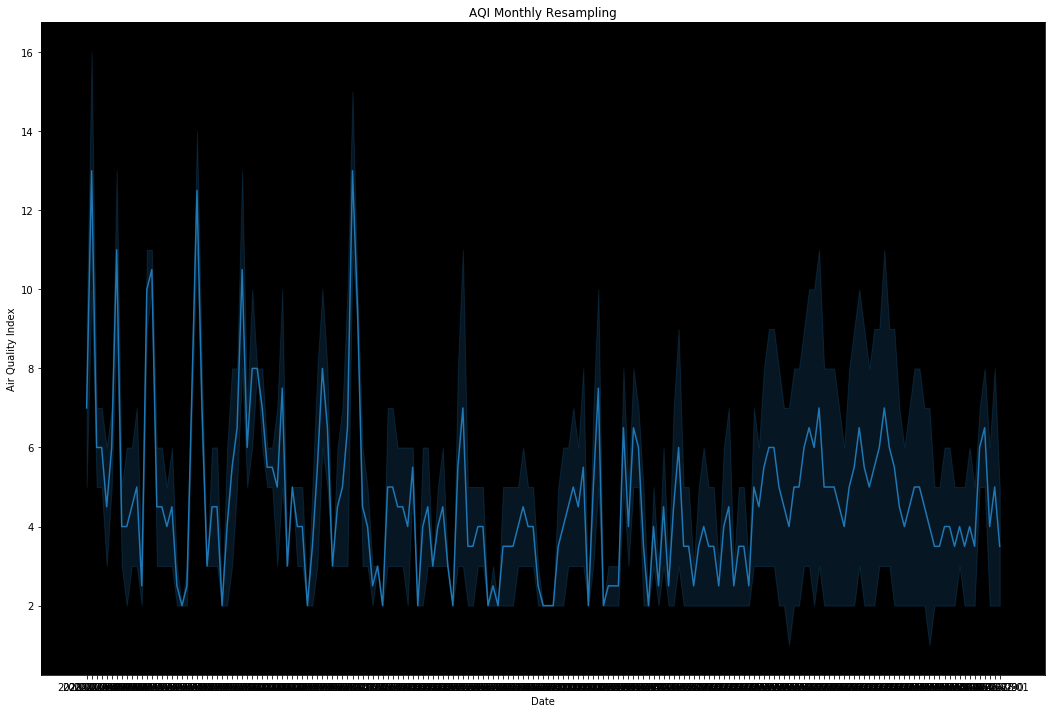

In [115]:
dc_df.index = pd.to_datetime(dc_df.index)
dc_df_monthly = dc_df.resample('M').mean()
fig, ax = plt.subplots(figsize=(18, 12))
ax = plt.axes()
ax.set_facecolor('black')

sns.lineplot(x='date_local', y='aqi', data=dc_df, ax=ax)
ax.set_title('AQI Monthly Resampling')
ax.set_ylabel('Air Quality Index')
ax.set_xlabel('Date');

In [116]:
dc_df = dc_df.drop(
    columns=['latitude', 
             'longitude', 
             'state_code', 
             'first_max_value',
             'first_max_hour',
             'cbsa_code',
             'cbsa',
             'datum',
             'event_type',
             'method',
             'units_of_measure'])
dc_df.head()

,county_code,site_number,parameter_code,poc,parameter,sample_duration,pollutant_standard,date_local,observation_count,observation_percent,validity_indicator,arithmetic_mean,aqi,method_code,local_site_name,site_address,state,county,city,date_of_last_change
1970-01-01 00:00:00.000000001,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-01,19,79.0,Y,0.205263,5.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05
1970-01-01 00:00:00.000000003,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-02,24,100.0,Y,0.583333,10.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05
1970-01-01 00:00:00.000000005,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-03,24,100.0,Y,0.254167,5.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05
1970-01-01 00:00:00.000000007,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-04,24,100.0,Y,0.291667,5.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05
1970-01-01 00:00:00.000000009,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-05,24,100.0,Y,0.208333,3.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05


C:\Users\trent\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


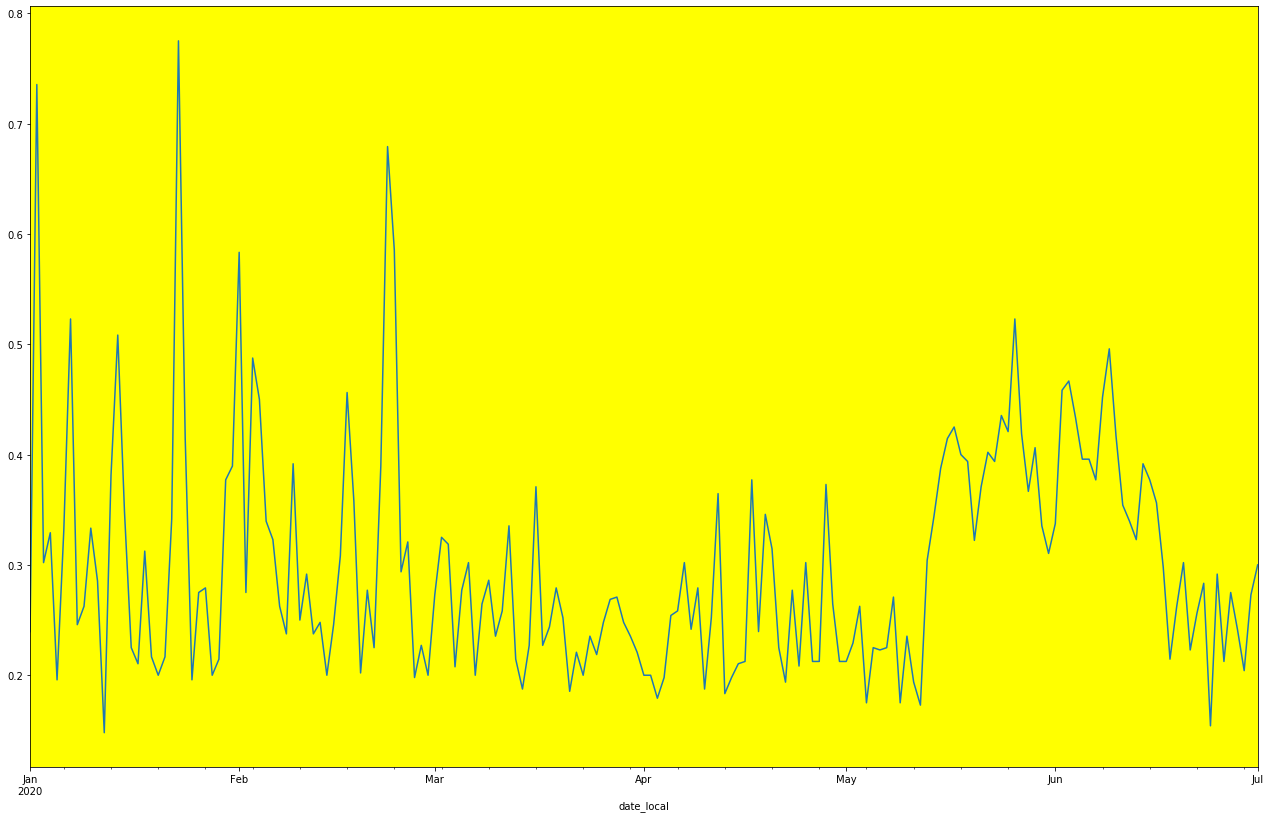

In [117]:
dc_df.date_local = pd.to_datetime(dc_df.date_local)
dc_df_daily_means = dc_df.groupby('date_local').mean()
dc_df_daily_means.arithmetic_mean.plot(figsize=(22, 14));

ax = plt.axes()
ax.set_facecolor('yellow')

C:\Users\trent\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


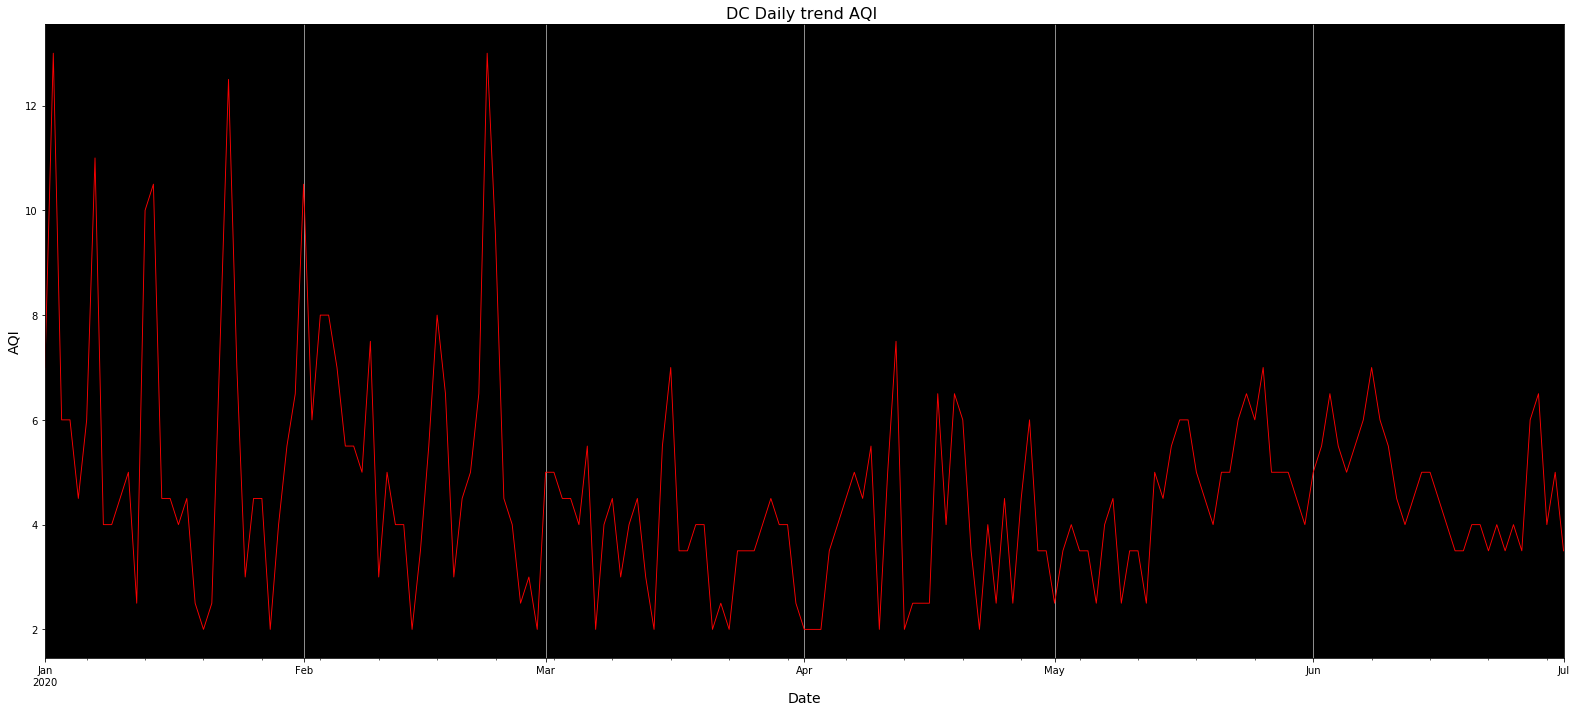

In [118]:
dc_df_daily_means.aqi.plot(figsize=(22,10), linewidth=.9,color='red',legend=False)

ax = plt.axes()
ax.set_facecolor('black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('AQI',fontsize=14)
plt.title('DC Daily trend AQI ',fontsize=16)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

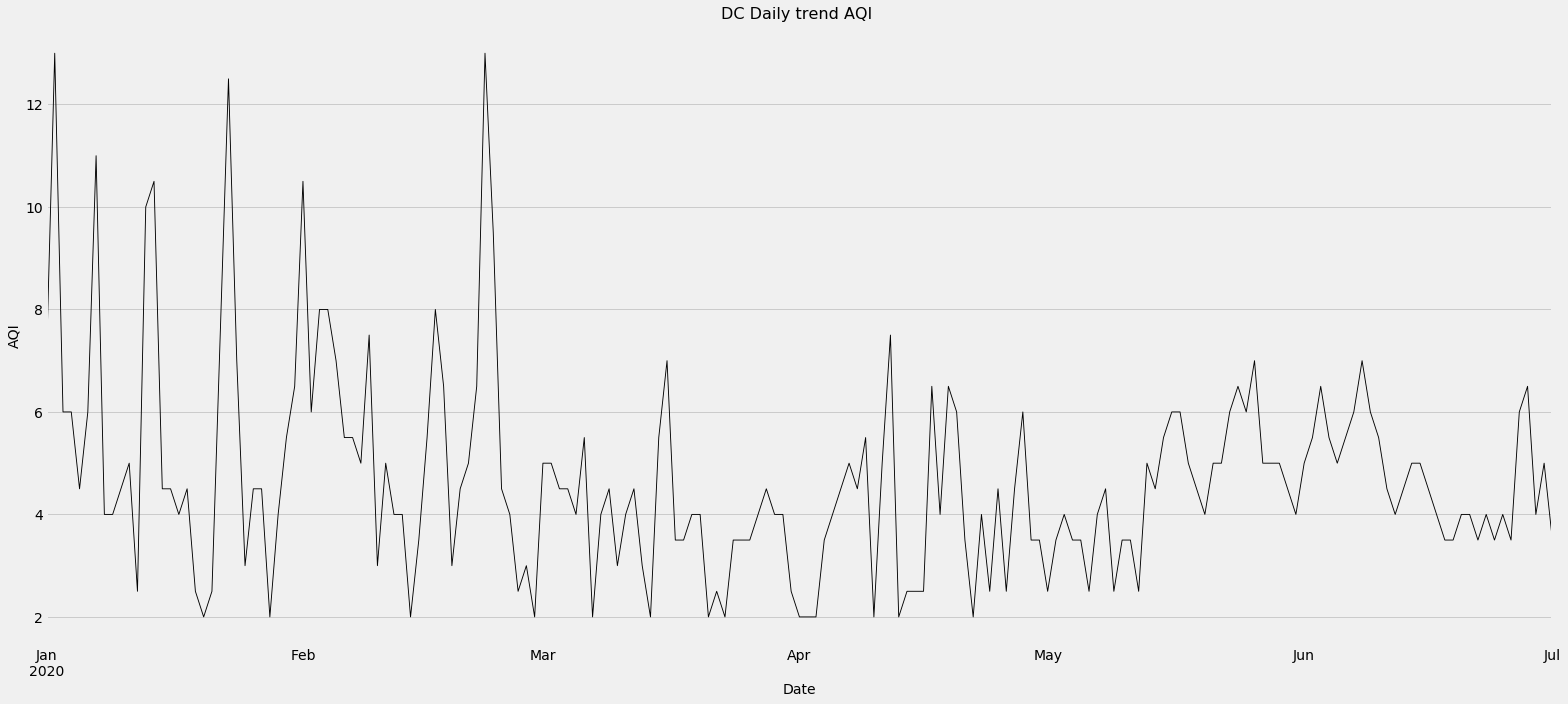

In [119]:
with plt.style.context('fivethirtyeight'):
    dc_df_daily_means.aqi.plot(figsize=(22,10),style='k-',linewidth=.9,legend=False)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('AQI',fontsize=14)
    plt.title('DC Daily trend AQI ',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

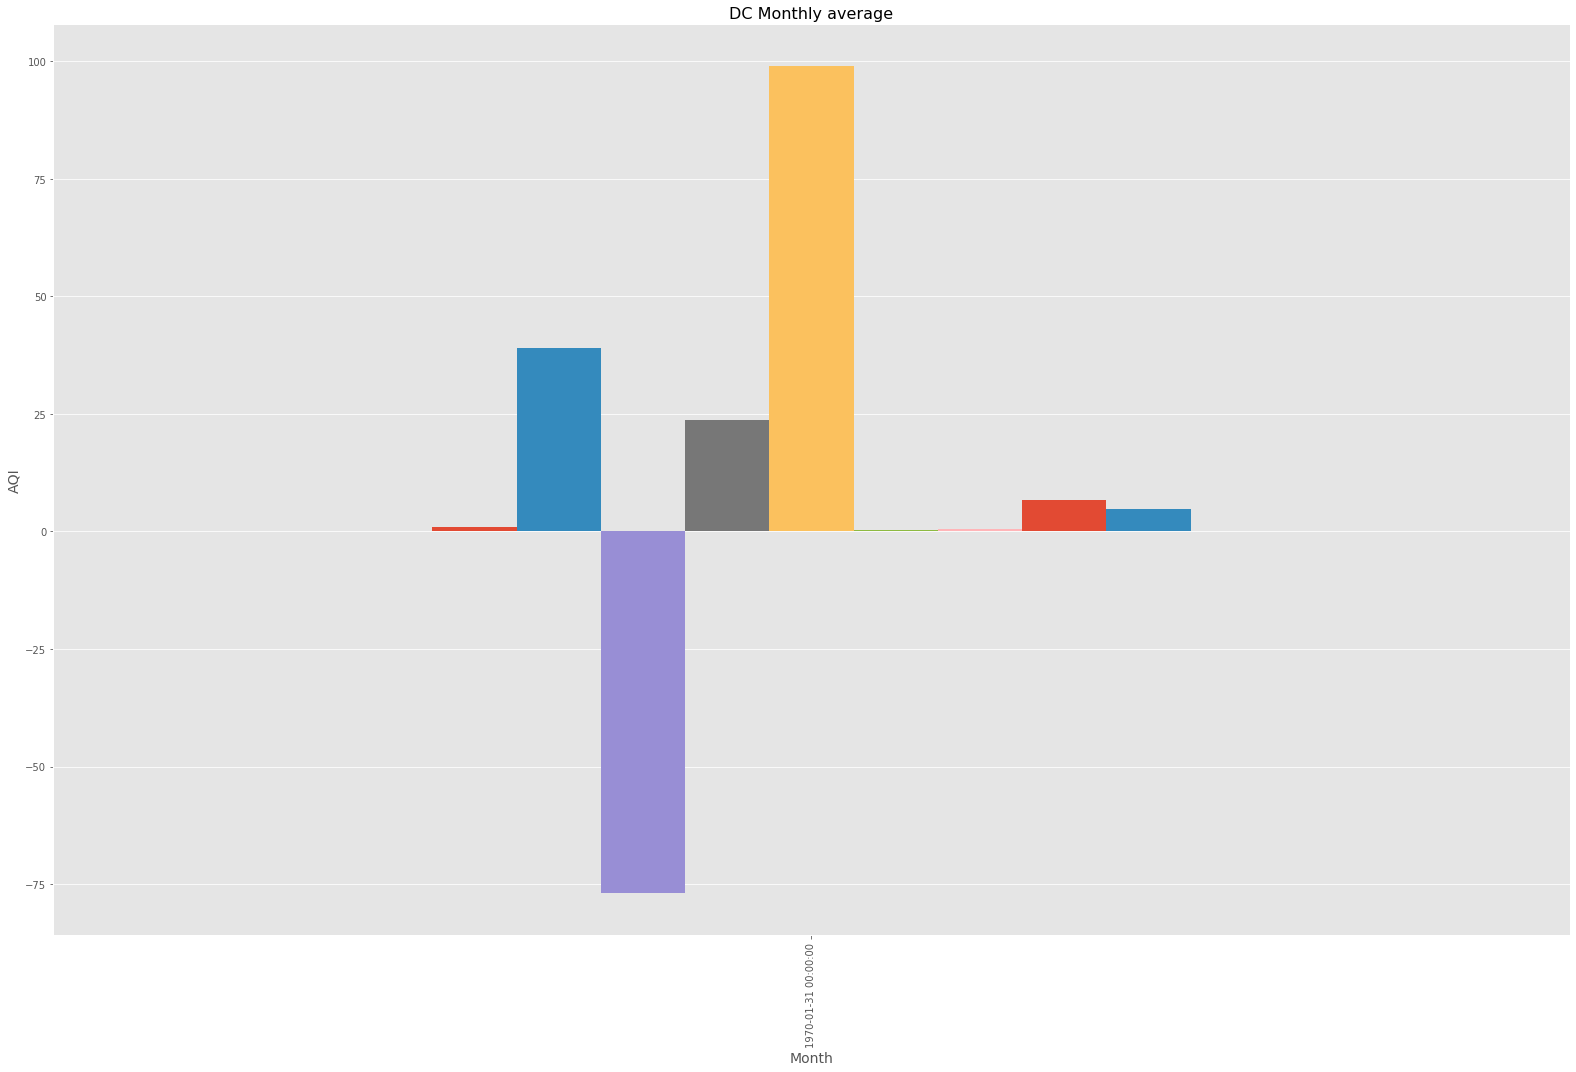

In [120]:
with plt.style.context('ggplot'):
    dc_df_monthly.plot(figsize=(22,15),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('AQI',fontsize=14)
    plt.title('DC Monthly average',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

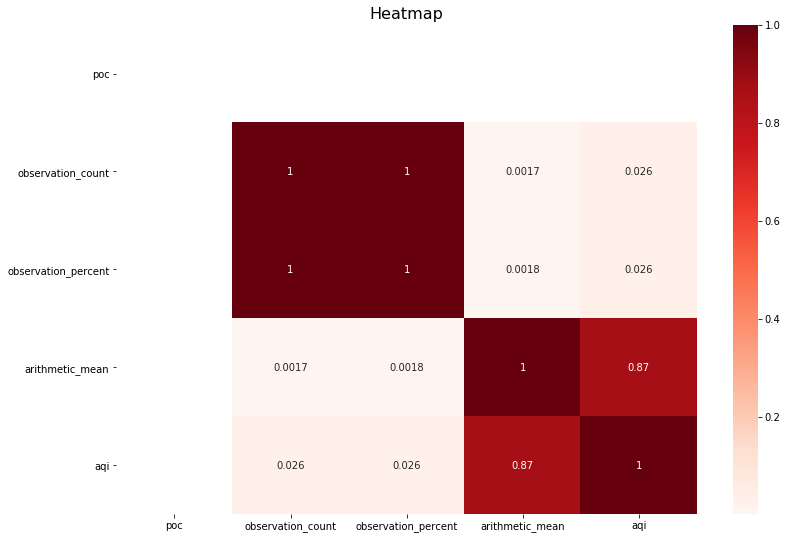

In [121]:
plt.figure(figsize=(13,9))
correlation_data = dc_df_daily_means
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap',fontsize=16)
plt.show()

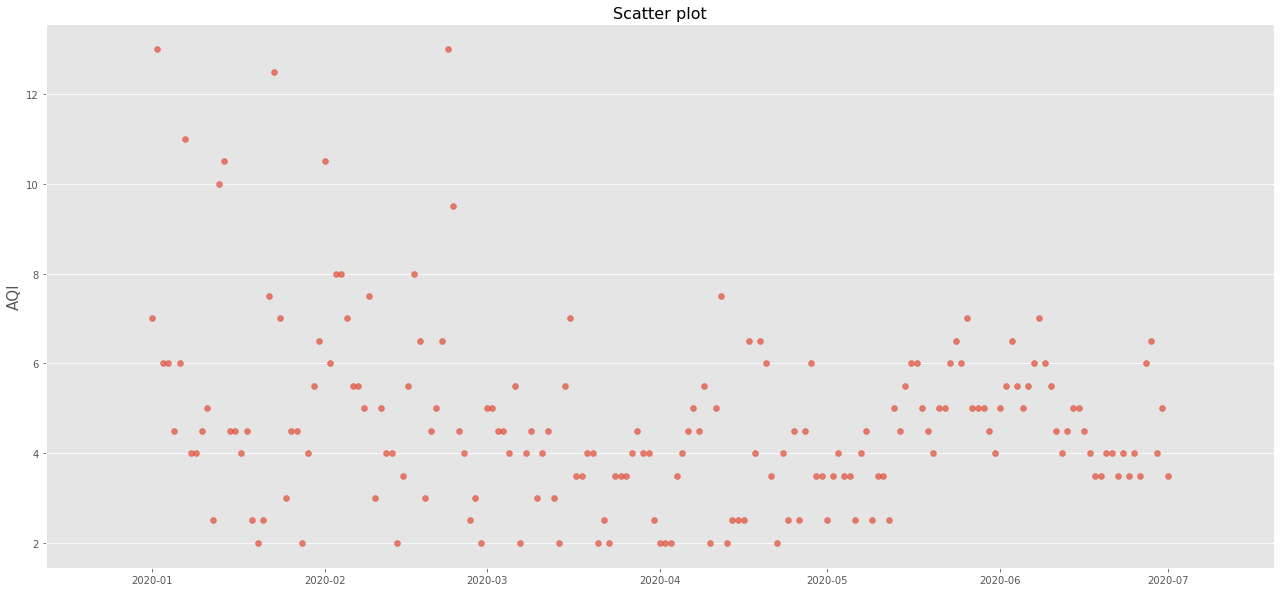

In [122]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(22,10))
    plt.scatter(dc_df_daily_means.aqi.index,dc_df_daily_means.aqi,alpha=.7)
    plt.title('Scatter plot',fontsize=16)
    plt.ylabel('AQI',fontsize=15)
    plt.grid(axis='x')
    plt.show()

In [123]:
# --------------------------------------------------- Massachusetts --------------------------------------------------------

In [124]:
# Create a DataFrame for Mass and pull carbon monoxide data from API

# Pull from 2019 and 2020 to merge, api does not allow pulls from multiple years together.
#2019
mass_params_cm_19 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass_cm_19_response = requests.get(daily_data_url, params = mass_params_cm_19).json()
mass_cm_19_data.append(mass_cm_19_response)

mass_cm_19_df = pd.DataFrame(mass_cm_19_data[0]["Data"])

#2020
mass_params_cm_20 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : Massachusetts}

    # Call to url
mass_cm_20_response = requests.get(daily_data_url, params = mass_params_cm_20).json()
mass_cm_20_data.append(mass_cm_20_response)

mass_cm_20_df = pd.DataFrame(mass_cm_20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_cm_df = mass_cm_19_df.append(mass_cm_20_df)
# merge_mass_df
# Drop unnecessary columns to clean DF
clean_mass_cm_df = merge_mass_cm_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)

clean_mass_cm_df

,latitude,longitude,sample_duration,date_local,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city,date_of_last_change
0,42.329500,-71.082600,1 HOUR,2019-01-01,0.181545,0.207,14,NaN,Massachusetts,Suffolk,Boston,2020-03-02
1,42.329500,-71.082600,8-HR RUN AVG END HOUR,2019-01-01,0.200000,0.200,5,2.0,Massachusetts,Suffolk,Boston,2020-03-02
2,42.329500,-71.082600,1 HOUR,2019-01-02,0.226217,0.446,17,NaN,Massachusetts,Suffolk,Boston,2020-03-02
3,42.329500,-71.082600,8-HR RUN AVG END HOUR,2019-01-02,0.229167,0.300,17,3.0,Massachusetts,Suffolk,Boston,2020-03-02
4,42.329500,-71.082600,1 HOUR,2019-01-03,0.265565,0.381,9,NaN,Massachusetts,Suffolk,Boston,2020-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...
696,42.120229,-72.584503,8-HR RUN AVG END HOUR,2020-01-04,0.779167,0.900,0,10.0,Massachusetts,Hampden,Springfield,2020-08-17
697,42.120229,-72.584503,1 HOUR,2020-01-05,0.166652,0.291,23,NaN,Massachusetts,Hampden,Springfield,2020-08-17
698,42.120229,-72.584503,8-HR RUN AVG END HOUR,2020-01-05,0.170833,0.300,0,3.0,Massachusetts,Hampden,Springfield,2020-08-17
699,42.120229,-72.584503,1 HOUR,2020-01-06,0.276625,0.405,6,NaN,Massachusetts,Hampden,Springfield,2020-08-17


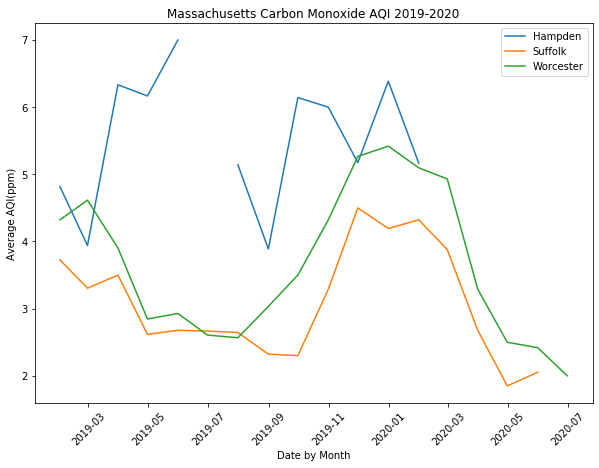

In [26]:
# Filter out the 1-hour sample_duration
sample_duration_cm = clean_mass_cm_df['sample_duration'] == '8-HR RUN AVG END HOUR'
clean_mass_cm_df = clean_mass_cm_df[sample_duration_cm]

# Groupby date
group_mass_cm = pd.DataFrame(clean_mass_cm_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)
# Convert the date_local in the index into 'datetime' format
group_mass_cm.index = pd.to_datetime(group_mass_cm.index)

# Average out data on a per month basis
mass_monthly_cm = group_mass_cm.resample('M').mean()
# mass_monthly_cm.head()

# Create first Line Chart for first_max_value of CO and data_local for Mass_df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly_cm.index
yvalue = mass_monthly_cm['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Carbon Monoxide AQI 2019-2020')
plt.plot(xvalue, yvalue)
plt.legend(yvalue)
# fig.savefig('MassplotCM.png')

In [27]:
# Ground Level Ozone for Massachusetts

mass_params_oz_19 = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass_oz_19_response = requests.get(daily_data_url, params = mass_params_oz_19).json()
mass_oz_19_data.append(mass_oz_19_response)

mass_oz_19_df = pd.DataFrame(mass_oz_19_data[0]["Data"])

#2020
mass_params_oz_20 = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20200101", "edate" : "20200801", "state" : Massachusetts}

    # Call to url
mass_oz_20_response = requests.get(daily_data_url, params = mass_params_oz_20).json()
mass_oz_20_data.append(mass_oz_20_response)

mass_oz_20_df = pd.DataFrame(mass_oz_20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_oz_df = mass_oz_19_df.append(mass_oz_20_df)
# merge_mass_df

# Drop unnecessary columns to clean DF
clean_mass_oz_df = merge_mass_oz_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)

clean_mass_oz_df

,latitude,longitude,sample_duration,date_local,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city,date_of_last_change
0,42.474642,-70.970816,1 HOUR,2019-01-01,0.027478,0.038,3,NaN,Massachusetts,Essex,Lynn,2020-03-02
1,42.474642,-70.970816,8-HR RUN AVG BEGIN HOUR,2019-01-01,0.026583,0.032,0,30.0,Massachusetts,Essex,Lynn,2020-03-02
2,42.474642,-70.970816,8-HR RUN AVG BEGIN HOUR,2019-01-01,0.026583,0.032,0,30.0,Massachusetts,Essex,Lynn,2020-03-02
3,42.474642,-70.970816,1 HOUR,2019-01-02,0.030208,0.036,13,NaN,Massachusetts,Essex,Lynn,2020-03-02
4,42.474642,-70.970816,8-HR RUN AVG BEGIN HOUR,2019-01-02,0.030042,0.034,7,31.0,Massachusetts,Essex,Lynn,2020-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...
10821,42.452299,-73.239648,8-HR RUN AVG BEGIN HOUR,2020-05-30,0.035765,0.042,10,39.0,Massachusetts,Berkshire,Pittsfield,2020-08-17
10822,42.452299,-73.239648,1 HOUR,2020-05-31,0.026391,0.034,17,NaN,Massachusetts,Berkshire,Pittsfield,2020-08-17
10823,42.452299,-73.239648,8-HR RUN AVG BEGIN HOUR,2020-05-31,0.027263,0.031,8,29.0,Massachusetts,Berkshire,Pittsfield,2020-08-17
10824,42.452299,-73.239648,8-HR RUN AVG BEGIN HOUR,2020-05-31,0.027263,0.031,8,29.0,Massachusetts,Berkshire,Pittsfield,2020-08-17


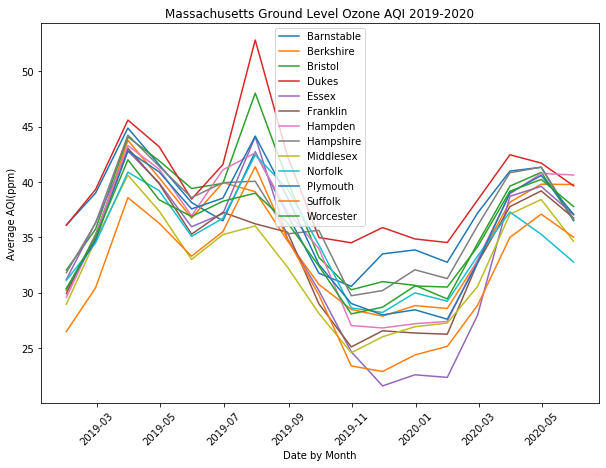

In [28]:
# Filter out the 1-hour sample_duration
sample_duration_oz = clean_mass_oz_df['sample_duration'] == '8-HR RUN AVG BEGIN HOUR'
clean_mass_oz_df = clean_mass_oz_df[sample_duration_oz]

# Groupby date and
group_mass_oz = pd.DataFrame(clean_mass_oz_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)

# Convert the date_local in the index into 'datetime' format
group_mass_oz.index = pd.to_datetime(group_mass_oz.index)

# Average out data on a per month basis
mass_monthly_oz = group_mass_oz.resample('M').mean()
# mass_monthly_oz.head()

# Create first Line Chart for Ground Level Ozone for Mass
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly_oz.index
yvalue = mass_monthly_oz['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Ground Level Ozone AQI 2019-2020')
plt.plot(xvalue, yvalue)
plt.legend(yvalue)
# fig.savefig('MassplotOZ.png')

In [29]:
#PM2.5  Mass

mass_params_pm_19 = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass_pm_19_response = requests.get(daily_data_url, params = mass_params_pm_19).json()
mass_pm_19_data.append(mass_pm_19_response)

mass_pm_19_df = pd.DataFrame(mass_pm_19_data[0]["Data"])

#2020
mass_params_pm_20 = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200401", "state" : Massachusetts}

    # Call to url
mass_pm_20_response = requests.get(daily_data_url, params = mass_params_pm_20).json()
mass_pm_20_data.append(mass_pm_20_response)

mass_pm_20_df = pd.DataFrame(mass_pm_20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_pm_df = mass_pm_19_df.append(mass_pm_20_df)
# merge_mass_df

# Drop unnecessary columns to clean DF
clean_mass_pm_df = merge_mass_pm_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)



# clean_mass_pm_df

,latitude,longitude,sample_duration,date_local,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city,date_of_last_change
0,41.330469,-70.785225,24 HOUR,2019-01-03,2.600000,2.6,0,11.0,Massachusetts,Dukes,Aquinnah,2020-08-04
1,41.330469,-70.785225,24 HOUR,2019-01-06,4.000000,4.0,0,17.0,Massachusetts,Dukes,Aquinnah,2020-08-04
2,41.330469,-70.785225,24 HOUR,2019-01-09,3.400000,3.4,0,14.0,Massachusetts,Dukes,Aquinnah,2020-08-04
3,41.330469,-70.785225,24 HOUR,2019-01-12,1.500000,1.5,0,6.0,Massachusetts,Dukes,Aquinnah,2020-08-04
4,41.330469,-70.785225,24 HOUR,2019-01-15,3.500000,3.5,0,15.0,Massachusetts,Dukes,Aquinnah,2020-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...
521,42.325186,-71.056061,24-HR BLK AVG,2019-06-28,9.600000,9.6,23,40.0,Massachusetts,Suffolk,Boston,2019-09-06
522,42.325186,-71.056061,1 HOUR,2019-06-29,11.166667,17.0,14,NaN,Massachusetts,Suffolk,Boston,2019-09-06
523,42.325186,-71.056061,24-HR BLK AVG,2019-06-29,11.100000,11.1,23,46.0,Massachusetts,Suffolk,Boston,2019-09-06
524,42.325186,-71.056061,1 HOUR,2019-06-30,4.333333,14.0,0,NaN,Massachusetts,Suffolk,Boston,2019-09-06


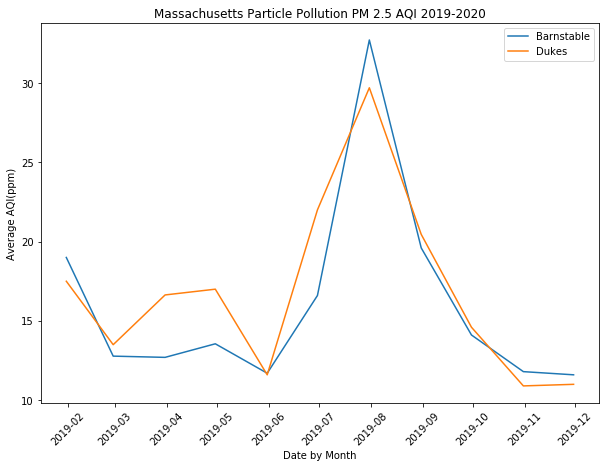

In [33]:
# Filter out the 1-hour sample_duration
sample_duration_pm = clean_mass_pm_df['sample_duration'] == '24 HOUR'
clean_mass_pm_df = clean_mass_pm_df[sample_duration_pm]

# Groupby date and fix null values
group_mass_pm = pd.DataFrame(clean_mass_pm_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)

# Convert the date_local in the index into 'datetime' format
group_mass_pm.index = pd.to_datetime(group_mass_pm.index)

# Average out data on a per month basis
mass_monthly_pm = group_mass_pm.resample('M').mean()
mass_monthly_pm

# Create first Line Chart for Particle Polution and the AQI assicated with it
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly_pm.index
yvalue = mass_monthly_pm['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Particle Pollution PM 2.5 AQI 2019-2020')
plt.plot(xvalue, yvalue)
plt.legend(yvalue)
# fig.savefig('MassplotPM.png')